## Importing the necessary libraries

In [1]:
## For data manipulation
import pandas as pd

## For numerical computations
import numpy as np

## For Visualizations
import seaborn as sns 
import matplotlib.pyplot as plt

## Importing the dataset needed for the analysis

In [2]:
ZER8 = ## Import the datasets for each reviewer here.
Wolfman = ## Import the datasets for each reviewer here.
ViktorLiu = ## Import the datasets for each reviewer here.
Steegecs = ## Import the datasets for each reviewer here.
Socal = ## Import the datasets for each reviewer here.
AnnAnna = ## Import the datasets for each reviewer here.
RobotTeddy = ## Import the datasets for each reviewer here.
AM2021 = ## Import the datasets for each reviewer here.
Ogunsojosam = ## Import the datasets for each reviewer here.
Richard = ## Import the datasets for each reviewer here.
Nadalie = ## Import the datasets for each reviewer here.
MountManu = ## Import the datasets for each reviewer here.
TheHound = ## Import the datasets for each reviewer here.
Z4yr0 = ## Import the datasets for each reviewer here.
Kylin = ## Import the datasets for each reviewer here.
Kish = ## Import the datasets for each reviewer here.
Jshua = ## Import the datasets for each reviewer here.
Anuj = ## Import the datasets for each reviewer here.
Stelescuvlad = ## Import the datasets for each reviewer here.
GreyTrainer = ## Import the datasets for each reviewer here.
Greg = ## Import the datasets for each reviewer here.
sheet11 = ## Import the datasets for each reviewer here.
Flobisnitz = ## Import the datasets for each reviewer here.
FizzyMidas = ## Import the datasets for each reviewer here.
Doggfather = ## Import the datasets for each reviewer here.
Emmanuel = ## Import the datasets for each reviewer here.
OxProof = ## Import the datasets for each reviewer here.
Tricelex = ## Import the datasets for each reviewer here.
Adebola = ## Import the datasets for each reviewer here.
LKH = ## Import the datasets for each reviewer here.
Bobjiang = ## Import the datasets for each reviewer here.
Iamgold = ## Import the datasets for each reviewer here.
BFA = ## Import the datasets for each reviewer here.
hes =  ## Import the datasets for each reviewer here.
Elbeth = ## Import the datasets for each reviewer here.


ml_anon = ## Import the datasets for each reviewer here.

In [7]:
# Storing each reviewer dataset in a list, for easy iteration.
## The ML dataset is also included.

names = [Adebola, AM2021, Anuj, Elbeth, BFA, Iamgold, Bobjiang, LKH, FizzyMidas,Tricelex, OxProof,
         Emmanuel, Doggfather, sheet11, Flobisnitz, Greg, GreyTrainer, Stelescuvlad,
        Kish, Jshua, Kylin, Z4yr0, TheHound, MountManu, Nadalie, Richard, Ogunsojosam, 
         AnnAnna, Socal, Steegecs, ViktorLiu, Wolfman, ZER8, RobotTeddy, hes, ml_anon, ]

In [8]:
len(names)

36

## Importing and formatting the ML dataset to work with the dataset.

In [9]:
## Dropping the irrelevant index attached by default to the dataset.
ml_anon.drop("Unnamed: 0", inplace=True, axis=1)

In [10]:
## Creating a column in the ML dataset that has the same format as the "Is Sybil? (T or F)" column in the reviewers dataset
ml_anon["Is Sybil? (T or F)"] = np.where(ml_anon.prediction_score == 1, "T", "F")

In [11]:
## Checking to make sure the created column is included in the dataset.
ml_anon.columns

Index(['handle', 'prediction_score', 'prediction_confidence', 'quant_1',
       'quant_2', 'quant_3', 'quant_4', 'quant_5', 'quant_6', 'quant_7',
       'Is Sybil? (T or F)'],
      dtype='object')

In [12]:
# Making a loop through all the datasheet of human evaluation,
# then renaming the Unnamed: 0 column to handle so that all the data used for the analysis have a column in common
for i in names:
    
    i.rename({"Unnamed: 0": "handle"}, axis=1, inplace=True)

In [13]:
def namestr(obj, namespace):
    """
    This function makes it posible to retrive the name of a variable (stored_data).
    """
    
    return [name for name in namespace if namespace[name] is obj]


In [14]:
def create_table(data1, data2):
    
    """
    This function creates a table for any two reviewer that share common handles reviewed.
    """
    
    df = pd.DataFrame()
    
    df = data1.merge(data2, on="handle", suffixes=(namestr(data1, globals())[0], namestr(data2, globals())[0]))
    
    df.dropna(subset=["Is Sybil? (T or F)" +namestr(data1, globals())[0], "Is Sybil? (T or F)" +namestr(data2, globals())[0]],
             inplace=True)
    
    return df

In [15]:
## This cell loops through 

def find_common_handles(name):
    
    """
    This function loops through the list of reviewers data and returns the each reviewer and number of handles they have in 
    common with the "name" given.
    """
    freq=[]
    for i in names:
        freq.append([namestr(i, globals())[0], create_table(name, i).shape[0]])
    return freq

In [16]:
def total_agreement(data, name1, name2):
    
    """
    This function calculates the total agreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 1 denotes they made the same call on all handles the reviewed in common.
    A score of 0 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] == data["Is Sybil? (T or F)" + name2]].shape[0]
    
    agreements = count
    
    return agreements/lenght
    

In [37]:
def handles_reviewed(data1, data2):
    
    table = create_table(data1, data2)
    
    return table.shape[0]

def common_handles(data):
    val = [handles_reviewed(data, i) for i in names ]
    

    nam = [namestr(i, globals())[0] for i in names ]
    
    
    df = pd.DataFrame()

    df["Reviewers"] = nam

    df[namestr(data, globals())[0]] = val
    
    return common_handles_df.merge(df, "outer",on = "Reviewers" )

In [17]:
def agreement(name1, name2):
    
    """
    This function creates the table and calculate the Cohen_kappa score at once.
    """
    
    data = create_table(name1, name2)
    
    lenght = data.shape[0]
    
    if lenght == 0:
        result = np.NaN
    else:
        count = data.loc[data["Is Sybil? (T or F)" + namestr(name1, globals())[0]] == 
                         data["Is Sybil? (T or F)" + namestr(name2, globals())[0]]].shape[0]

        result = count/lenght
    
    return result

In [18]:
def t_agree(data):
    val = [agreement(data, i) for i in names if namestr(i, globals())[0] not in [namestr(data, globals())[0]] ]
    val.append(1)

    nam = [namestr(i, globals())[0] for i in names if namestr(i, globals())[0] not in [namestr(data, globals())[0]]]
    nam.append(namestr(data, globals())[0])
    
    df = pd.DataFrame()

    df["Reviewers"] = nam

    df[namestr(data, globals())[0]] = val
    
    return total_agreement_df.merge(df, "outer",on = "Reviewers" )

In [19]:
def total_disagreement(data, name1, name2):
    
    """
    This function calculates the total disagreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 0 denotes they made the same call on all handles the reviewed in common.
    A score of 1 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] != data["Is Sybil? (T or F)" + name2]].shape[0]
    
    disagreements = count
    
    return disagreements/lenght

## Common Handles 

In [ ]:
def handles_reviewed(data1, data2):
    
    """
    This function returns the number of handles reviewed by a pair of reviewers (name1 and name2)
    """
    
    table = create_table(data1, data2)
    
    return table.shape[0]

def common_handles(data):
    
    """
    
    This function automates the process...
    """
    val = [handles_reviewed(data, i) for i in names ]
    

    nam = [namestr(i, globals())[0] for i in names ]
    
    
    df = pd.DataFrame()

    df["Reviewers"] = nam

    df[namestr(data, globals())[0]] = val
    
    return common_handles_df.merge(df, "outer",on = "Reviewers" )

In [20]:
reviewers = []

## This for loop, is used to generate the names of reviewers for this round
for i in names:
    reviewers.append(namestr(i, globals())[0])
    
## Creating a dataset for the common handles by all reviewers
common_handles_df = pd.DataFrame()
common_handles_df["Reviewers"] = reviewers

for i in names:
    ## This loops through the automated code, and stores the numbers as required.
    common_handles_df = common_handles(i)

In [40]:
common_handles_df

,Reviewers,Adebola,AM2021,Anuj,Elbeth,BFA,Iamgold,Bobjiang,LKH,FizzyMidas,...,Ogunsojosam,AnnAnna,Socal,Steegecs,ViktorLiu,Wolfman,ZER8,RobotTeddy,hes,ml_anon
0,Adebola,60,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,AM2021,0,60,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,2
2,Anuj,0,1,60,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1
3,Elbeth,0,0,0,59,0,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
4,BFA,1,0,0,0,60,2,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,Iamgold,0,1,0,0,2,60,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,Bobjiang,0,0,0,1,0,0,60,0,1,...,0,0,0,1,0,0,0,0,0,1
7,LKH,0,1,1,1,0,0,0,60,0,...,0,0,0,0,0,0,0,1,0,1
8,FizzyMidas,0,0,1,1,1,0,1,0,60,...,0,0,0,1,1,2,1,1,1,1
9,Tricelex,0,1,0,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0


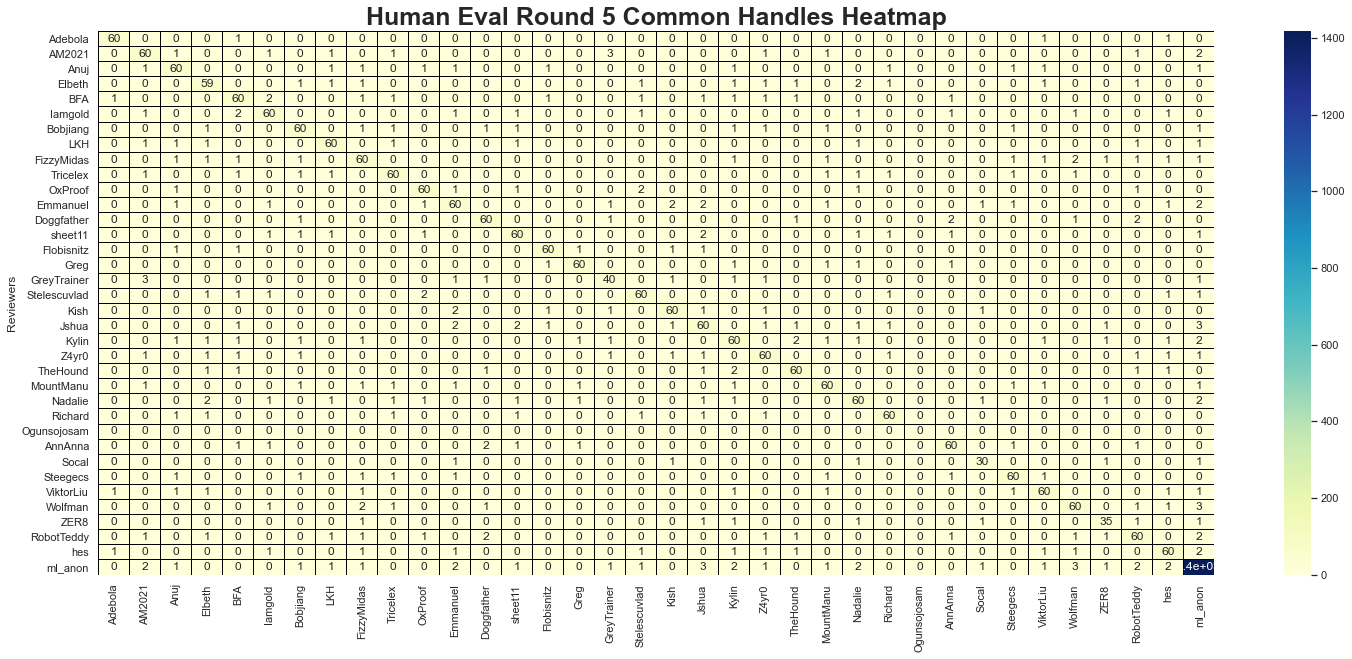

In [42]:
# You can change the values here to your taste.
plt.figure(figsize=(25,10))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.heatmap(common_handles_df.set_index("Reviewers"), annot=True, cmap="YlGnBu", linecolor="black", linewidths=0.5)
plt.title("Human eval round 5 common handles heatmap".title(), fontsize=25, weight="bold")
plt.savefig("Human eval round 5 common handles heatmap.png")
plt.show()


## Total Agreement Round 5

In [21]:
total_agreement_df = pd.DataFrame()
total_agreement_df["Reviewers"] = reviewers

In [22]:
for i in names:
    total_agreement_df = t_agree(i)

In [23]:
total_agreement_df

,Reviewers,Adebola,AM2021,Anuj,Elbeth,BFA,Iamgold,Bobjiang,LKH,FizzyMidas,...,Ogunsojosam,AnnAnna,Socal,Steegecs,ViktorLiu,Wolfman,ZER8,RobotTeddy,hes,ml_anon
0,Adebola,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
1,AM2021,NaN,1.000000,1.0,NaN,NaN,0.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.000000
2,Anuj,NaN,1.000000,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.000000
3,Elbeth,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4,BFA,0.0,NaN,NaN,NaN,1.0,0.5,NaN,NaN,1.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Iamgold,NaN,0.000000,NaN,NaN,0.5,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.000000,NaN,NaN,1.0,NaN
6,Bobjiang,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.000000
7,LKH,NaN,1.000000,1.0,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.000000
8,FizzyMidas,NaN,NaN,1.0,0.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,1.0,1.0,0.000000,1.0,0.0,1.0,1.000000
9,Tricelex,NaN,1.000000,NaN,NaN,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN


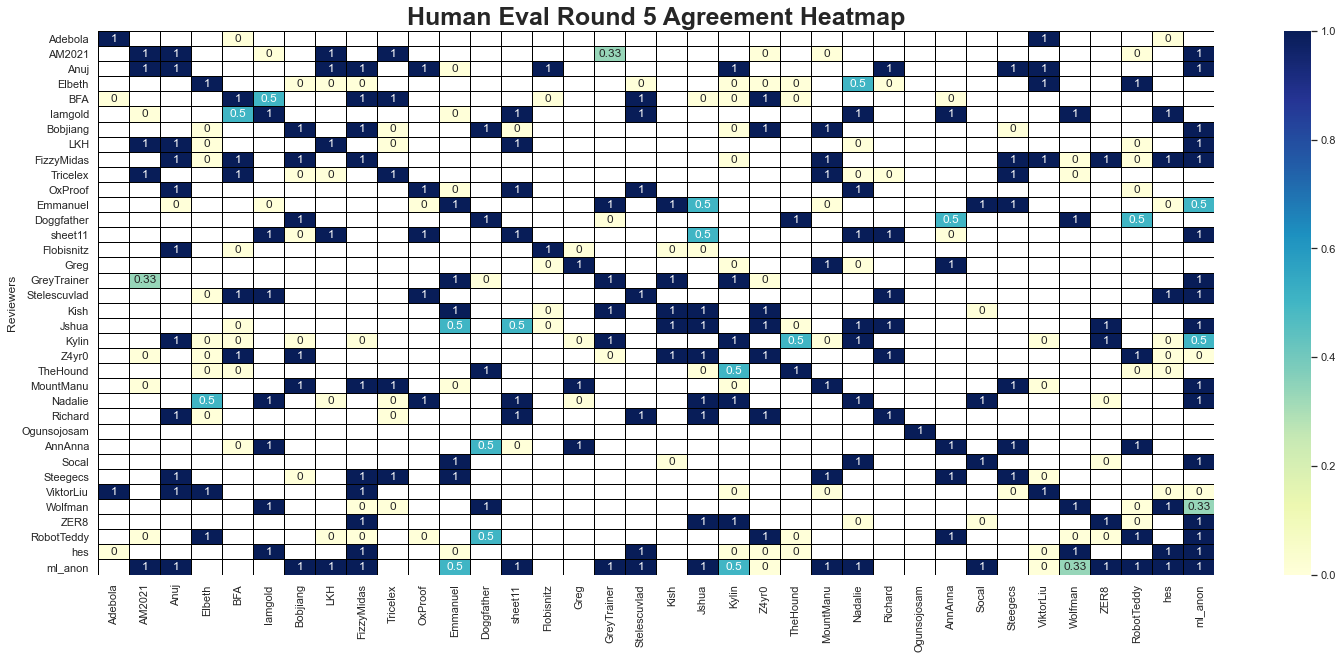

In [26]:
# You can change the values here to your taste.
plt.figure(figsize=(25,10))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#corr.rename({"Unnamed: 0": " "}, axis=1, inplace=True)
sns.heatmap(total_agreement_df.set_index("Reviewers"), annot=True, cmap="YlGnBu", linecolor="black", linewidths=0.5)
plt.title("Human eval round 5 agreement heatmap".title(), fontsize=25, weight="bold")
plt.savefig("Human eval round 5 agreement heatmap.png")
plt.show()
